# Embeddings

## Instalación de paquetes e Imports

In [1]:
!pip install --upgrade gensim numpy scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you

Si surgen conflictos en Colab luego de correr el bloque de código anterior, considera reiniciar el entorno de Colab (Runtime → Restart runtime) después de instalar los paquetes.

Cargamos las librerías que vamos a utilizar

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import dot
from numpy.linalg import norm
from sklearn.decomposition import PCA

In [24]:
# mayor ancho en el print() antes que se genere un salto de línea
np.set_printoptions(edgeitems=12)                 # mostrar más elementos al principio y final
np.set_printoptions(threshold=150)                # ancho para los arrays
np.set_printoptions(linewidth=175)                # saltos de línea   # linewidth=np.inf
np.set_printoptions(precision=3, suppress=True)   # 4 decimales en lugar de notación científica

## Similitud del coseno


Los embeddings son como una forma matemática de representar palabras, que permite a las computadoras "entender" el lenguaje de una manera más parecida a cómo lo hacen los humanos.


Siendo A y B dos vectores,

$\cos\theta = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}$

Explicación de los símbolos:

* cosθ: El coseno del ángulo θ entre los dos vectores.
* A y B: Los dos vectores que se están comparando.
* A · B: El producto punto (o producto escalar) de los vectores A y B.
* ||A|| y ||B||: Las normas (o magnitudes) de los vectores A y B, respectivamente.

### ¿Qué hace la similitud del coseno?

La similitud del coseno es una medida de cuán similares son dos vectores en un espacio vectorial. El valor de cosθ varía entre -1 y 1:

* cosθ = 1: Los vectores son completamente paralelos (misma dirección).
* cosθ = -1: Los vectores son completamente antiparalelos (direcciones opuestas).
* cosθ = 0: Los vectores son ortogonales (perpendiculares).


**Usos comunes:**

* Recuperación de información: Para encontrar documentos relevantes en una base de datos.
* Recomendación de sistemas: Para sugerir productos o contenido a los usuarios.
* Análisis de clusters: Para agrupar datos similares.


Abajo se desarrolla la función *cosine_similarity* que implementa la fórmula:


$\cos\theta = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}$


## Word Embedding

### Descargar los Modelos

Vamos a aplicar el concepto de **términos similares**.

Para ello vamos a vectorizar las palabras usando el `embedding Glove`. Primero es necesario indicarle a `gensim` que descarge dicho embedding.


In [3]:
import gensim.downloader as gensim

model_word2vec = gensim.load('word2vec-google-news-300')  # word2vec
model_glove = gensim.load("glove-wiki-gigaword-100")      # glove

print("word2vec tokens:", len(model_word2vec))
print("glove tokens:", len(model_glove))

word2vec tokens: 3000000
glove tokens: 400000


### model.most_similar()

Una vez creado el modelo de embedding, podemos usar funciones como `most_similar` para traer los tokens más similares o cercanos según su distancia. Observa los ejemplos.

In [34]:
print("word2vec:")
print(model_word2vec.most_similar("king", topn=5))
print(model_word2vec.most_similar("woman", topn=5))
print(model_word2vec.most_similar("banana", topn=5))
print(model_word2vec.most_similar("apple", topn=5))

print("\nglove:")
print(model_glove.most_similar("king", topn=5))
print(model_glove.most_similar("woman", topn=5))
print(model_glove.most_similar("banana", topn=5))
print(model_glove.most_similar("apple", topn=5))

word2vec:
[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474)]
[('man', 0.7664012908935547), ('girl', 0.7494640946388245), ('teenage_girl', 0.7336829304695129), ('teenager', 0.6317085027694702), ('lady', 0.6288785934448242)]
[('bananas', 0.7523775696754456), ('pineapple', 0.6587537527084351), ('mango', 0.6365211009979248), ('pineapples', 0.6313878297805786), ('papaya', 0.6063665747642517)]
[('apples', 0.720359742641449), ('pear', 0.6450697183609009), ('fruit', 0.6410146355628967), ('berry', 0.6302295327186584), ('pears', 0.613396167755127)]

glove:
[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175)]
[('girl', 0.8472671508789062), ('man', 0.832349419593811), ('mother', 0.827568769454956), ('boy', 0.7720510363578796), ('she', 0.7632068395614624)]
[('coconut', 0.7097253203

### Analogías

Puedes resolver analogías como "A es a B como C es a _" haciendo A + C - B.

In [35]:
# US is to burger as Italy is to ___?
most_similar1 = model_word2vec.most_similar(positive=["Italy", "burger"], negative=["USA"], topn=5)
most_similar2 = model_word2vec.most_similar(positive=["Mexico", "burger"], negative=["USA"], topn=5)
most_similar3 = model_word2vec.most_similar(positive=["Argentina", "burger"], negative=["USA"], topn=5)

print("word2vec:")
print(most_similar1)
print(most_similar2)
print(most_similar3)

print("\nglove:")
most_similar4 = model_glove.most_similar(positive=["water", "couple"], negative=["love"], topn=5)
print(most_similar4)

word2vec:
[('panino', 0.5671379566192627), ('calzone', 0.5634884238243103), ('burgers', 0.5619243383407593), ('salumi', 0.5589883923530579), ('cheeseburger', 0.5564999580383301)]
[('taco', 0.6266060471534729), ('burrito', 0.6186113357543945), ('fajitas', 0.5847300291061401), ('tacos', 0.5555879473686218), ('burgers', 0.5548141002655029)]
[('steak_sandwich', 0.5671319365501404), ('parrilla', 0.5663920640945435), ('burgers', 0.5630355477333069), ('burrito', 0.5422383546829224), ('hamburger', 0.5377135276794434)]

glove:
[('nearby', 0.5953056216239929), ('few', 0.5887836813926697), ('area', 0.5879793763160706), ('large', 0.5824193358421326), ('small', 0.5776934027671814)]


### Palabra que no corresponda a una lista

Podemos usar la función doesnt_match para encontrar un término que no esté relacionado a los otros.

In [38]:
doesnt_match1 = model_word2vec.doesnt_match(["summer", "fall", "spring", "air"])
doesnt_match2 = model_glove.doesnt_match(["summer", "fall", "spring", "air"])

print(doesnt_match1)
print(doesnt_match2)

air
air


### Obtener el vector embedding de uno o varios tokens

Dada unas palabras de ejemplo que almacenamos en words, vamos a traer los vectores embeddings que las representan

In [42]:
# palabras de ejemplo
words = ['king', 'queen', 'man', 'woman', 'apple', 'banana']

# obtener los vectores para esas palabras
word_vectors1 = np.array([model_word2vec[word] for word in words])
word_vectors2 = np.array([model_glove[word] for word in words])

print("shape:", word_vectors1.shape, word_vectors2.shape, "\n")
print("word_vectors:", "\n", word_vectors1, "\n")
print("word_vectors:", "\n", word_vectors2, "\n")

shape: (6, 300) (6, 100) 

word_vectors: 
 [[ 0.126  0.03   0.009  0.14  -0.026 -0.036  0.112 -0.198  0.051  0.363 -0.242 -0.303 ...  0.03  -0.059 -0.005 -0.244 -0.21  -0.287 -0.045 -0.178 -0.279 -0.086  0.091  0.252]
 [ 0.005 -0.144 -0.069  0.124  0.132 -0.089 -0.071 -0.217 -0.197  0.056 -0.076 -0.381 ... -0.006  0.146 -0.005 -0.226 -0.379 -0.377 -0.083 -0.041  0.168 -0.047  0.163  0.154]
 [ 0.326  0.131  0.035 -0.083  0.09  -0.041 -0.198  0.007  0.144  0.002  0.029 -0.25  ...  0.072  0.14   0.155 -0.031 -0.202 -0.13  -0.101 -0.064 -0.083 -0.303 -0.08   0.021]
 [ 0.243 -0.077 -0.103 -0.107  0.118 -0.107 -0.114  0.026  0.112  0.049 -0.097 -0.344 ...  0.001  0.395  0.104 -0.066 -0.268 -0.247 -0.073  0.108  0.119 -0.083  0.065 -0.029]
 [-0.064 -0.16  -0.012  0.135 -0.229  0.162  0.305 -0.18  -0.121  0.254 -0.014 -0.064 ...  0.001  0.297 -0.127 -0.04   0.132 -0.166  0.125  0.051 -0.149  0.137 -0.021  0.344]
 [-0.085  0.047 -0.069  0.303 -0.188 -0.032  0.03  -0.205 -0.09   0.299  0.211 -0.

### Graficar los embeddins en 2D

In [54]:
# reducir las dimensiones para visualización
pca = PCA(n_components=2)
word2vec_2d = pca.fit_transform(word_vectors1)
glove_2d = pca.fit_transform(word_vectors2)

print("word2vec:", "\n", word2vec_2d, "\n")
print("glove:", "\n", glove_2d)

word2vec: 
 [[ 1.32   1.386]
 [ 1.466  1.206]
 [ 0.517 -1.574]
 [ 0.675 -1.812]
 [-2.092  0.306]
 [-1.885  0.488]] 

glove: 
 [[ 1.831 -3.127]
 [ 2.114 -2.348]
 [ 1.825  2.32 ]
 [ 2.061  3.113]
 [-4.129 -0.462]
 [-3.702  0.504]]


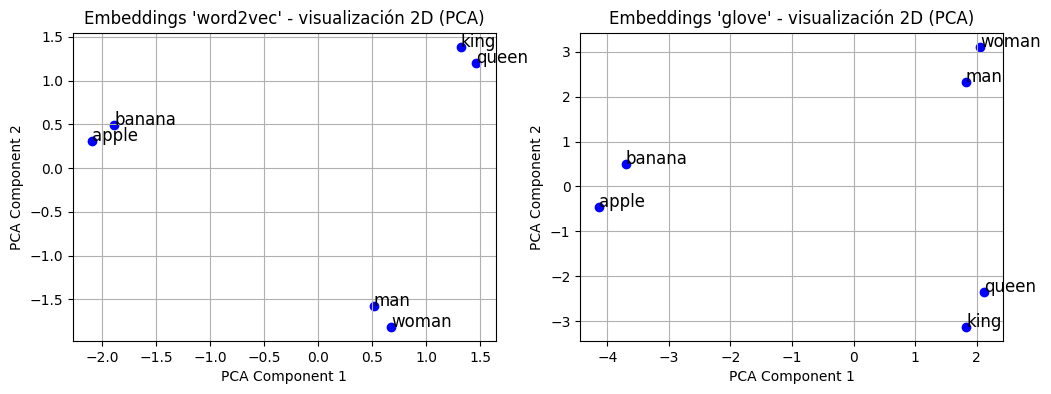

In [79]:
# graficar las palabras en el espacio 2D reducido
plt.figure(figsize=(12, 4))

for i in range(2):

  x_list = []
  y_list = []
  title = "word2vec" if i == 0 else "glove"

  plt.subplot(1, 2, i+1)

  for j, word in enumerate(words):
    x = word2vec_2d[j, 0] if i == 0 else glove_2d[j, 0]
    y = word2vec_2d[j, 1] if i == 0 else glove_2d[j, 1]
    x_list.append(x)
    y_list.append(y)
    plt.text(x, y, word, fontsize=12)

  plt.scatter(x_list, y_list, marker='o', color='blue')
  plt.title(f"Embeddings '{ title }' - visualización 2D (PCA)")
  plt.xlabel("PCA Component 1")
  plt.ylabel("PCA Component 2")
  plt.grid(True)

plt.show()

### Similitud del coseno de nuestras palabras ejemplo

In [80]:
# función para calcular la similitud del coseno
def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [82]:
# ejemplo de similitud del coseno
word_pairs = [('king', 'queen'), ('man', 'woman'), ('apple', 'banana'), ('king', 'man')]

word2vec_similarities = []
glove_similarities = []

for word1, word2 in word_pairs:
  vec1 = model_word2vec[word1]
  vec2 = model_word2vec[word2]
  sim = cosine_similarity(vec1, vec2)
  word2vec_similarities.append((word1, word2, sim))

for word1, word2 in word_pairs:
  vec1 = model_glove[word1]
  vec2 = model_glove[word2]
  sim = cosine_similarity(vec1, vec2)
  glove_similarities.append((word1, word2, sim))

In [83]:
df_similarities = pd.DataFrame(word2vec_similarities, columns=["Word 1", "Word 2", "Cosine Similarity"])
df_similarities

,Word 1,Word 2,Cosine Similarity
0,king,queen,0.651096
1,man,woman,0.766401
2,apple,banana,0.531841
3,king,man,0.229427


In [84]:
df_similarities = pd.DataFrame(glove_similarities, columns=["Word 1", "Word 2", "Cosine Similarity"])
df_similarities

,Word 1,Word 2,Cosine Similarity
0,king,queen,0.750769
1,man,woman,0.832349
2,apple,banana,0.505447
3,king,man,0.511868


# Tarea en casa

## 1. Usa otro modelo de embedding

Utiliza otro modelo de embedding y corre el mismo código anterior.  
Puedes copiar y pegar las celdas de arriba, abajo, o ir probando a la par arriba. ¿Cuáles son las diferencias que notas?

## 2. Comparando palabras

Usar el modelo para hacer un ranking de las siguientes 15 palabras según su similitud con las palabras "man" y "woman".  
Para cada par, imprime su similitud.

In [93]:
words = ["wife", "husband", "child", "queen", "king", "man", "woman", "birth", "doctor",
         "nurse", "teacher", "professor", "engineer", "scientist", "president"]

In [98]:
# prompt: Dado el modelo embedding model, calcular para cada palabra en words la similitud con man y woman. Armar un dataframe con los resultados.
import pandas as pd

data = []

for word in words:
  if word in model_word2vec:
    sim_man = cosine_similarity(model_word2vec[word], model_word2vec['man'])
    sim_woman = cosine_similarity(model_word2vec[word], model_word2vec['woman'])
    data.append([word, sim_man, sim_woman])
  else:
    print(f"'{ word }' not in vocabulary")

df_similarity_man_woman = pd.DataFrame(data, columns=["Word", "Man similarity", "Woman similarity"])
df_similarity_man_woman.head(5)

,Word,Man similarity,Woman similarity
0,wife,0.329209,0.444824
1,husband,0.344997,0.492814
2,child,0.316333,0.475004
3,queen,0.166582,0.316181
4,king,0.229427,0.128480
5,man,1.000000,0.766401
6,woman,0.766401,1.000000
7,birth,0.110788,0.214713
8,doctor,0.314490,0.379459
9,nurse,0.254723,0.441356


¿ Cuáles son las conclusiones que tienes sobre estos resultados?